In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import IsolationForest


Veri Düzenleme İşlemleri

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/verimadenciligi/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#Missing Values
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


[0.02244212 0.00362784 0.01078169 0.00477803 0.02972807 0.00380132
 0.00991965 0.02377463 0.01499306 0.00388178 0.00373635 0.0866905
 0.78184495]


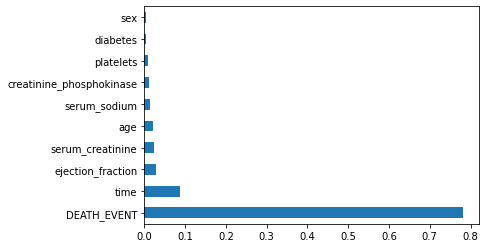

In [ ]:
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
Features = ['time','ejection_fraction','serum_creatinine']
x = data[Features]
y = data["DEATH_EVENT"]

# Train Test split
train_x, test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=2)

In [ ]:
"""
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(train_x)
mask = yhat != -1
train_x, train_y = train_x.iloc[mask, :], train_y.iloc[mask]
"""

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
misclassified = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i = knn.predict(test_x)
    misclassified.append((test_y != pred_i).sum())
print("Misclassified = ", misclassified)

Misclassified =  [6, 6, 8, 7, 5, 5, 5, 5, 5, 5, 3, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6]


In [ ]:
#knn
KNN_classifier = KNeighborsClassifier(n_neighbors=11)
KNN_classifier.fit(train_x, train_y)
prediction =  KNN_classifier.predict(test_x)
accuracy_score = accuracy_score(test_y,prediction)
print("accuracy_score without outlier KNN=11 :",accuracy_score)

accuracy_score without outlier KNN=11 : 0.95


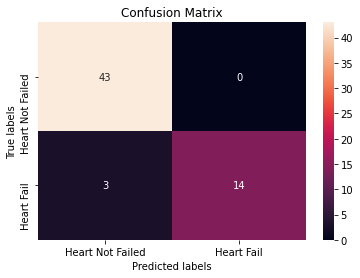

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_y, prediction)
ac = accuracy_score(test_y, prediction)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Heart Not Failed', 'Heart Fail']); ax.yaxis.set_ticklabels(['Heart Not Failed', 'Heart Fail']);


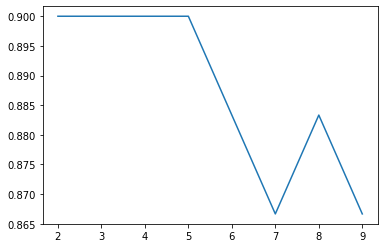

In [ ]:
from sklearn.tree import DecisionTreeClassifier
"""
#from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(train_x, train_y)
    y_pred = classifier.predict(test_x)
    list1.append(accuracy_score(test_y,y_pred))
#print(mylist)
plt.plot(list(range(2,10)), list1)
plt.show()
"""

In [ ]:
classifier = DecisionTreeClassifier(max_leaf_nodes = 2, random_state=0, criterion='entropy')
classifier.fit(train_x, train_y)
y_pred = classifier.predict(test_x)
#from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_y, y_pred)
ac = accuracy_score(test_y, y_pred)
print("Dec Tree Classifier acc without outlier:",ac)
print("Confusion Matrix:",cm)

Dec Tree Classifier acc without outlier: 0.9
Confusion Matrix: [[43  0]
 [ 6 11]]


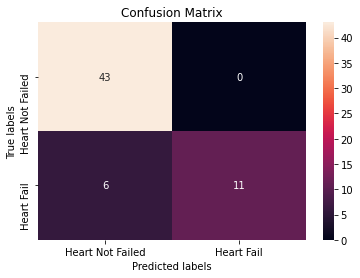

In [ ]:
#cm = confusion_matrix(test_y, prediction)
#ac = accuracy_score(test_y, prediction)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Heart Not Failed', 'Heart Fail']); ax.yaxis.set_ticklabels(['Heart Not Failed', 'Heart Fail']);